### Example of using the Bayesian optimisation package in 2D. This script utilises batch sampling, but not bounds reduction or sub-batch sampling.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as con
import sys
import os

sys.path.append('..')
import BOPackage

Max possible value: 7.389056098930652


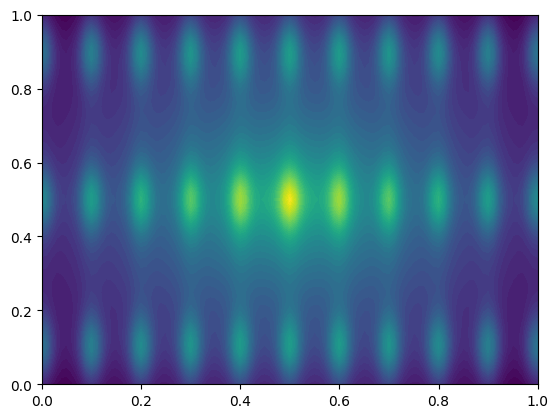

In [15]:
def ObjectiveFunction(X):
    x1 = 10 * (X[0] - 0.5)
    x2 = 10 * (X[1] - 0.5)

    return - (-20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x1**2 + x2**2))) - np.exp(1 * (np.cos(0.5 * con.pi * x1) + np.cos(2 * con.pi * x2))) + con.e + 20)
 

X1 = np.linspace(0, 1, 101, endpoint=True)
X2 = np.linspace(0, 1, 101, endpoint=True)

# Create the meshgrid
X1_grid, X2_grid = np.meshgrid(X1, X2)

# Combine the grid into an n**2 x 2 matrix
candidate_x = np.vstack([X1_grid.ravel(), X2_grid.ravel()]).T

result = np.empty([len(X1), len(X2)])

for i, x1 in enumerate(X1):
    for j, x2 in enumerate(X2):
        result[i, j] = ObjectiveFunction([x1, x2])

plt.contourf(X1, X2, result, levels=50)
print('Max possible value:', np.max(result))

In [16]:
def PriorMeanFunction(X):
    return - np.ones(len(X)).reshape(len(X), 1)

In [17]:
"""
Configure the optimiser.
"""
PriorMean = PriorMeanFunction
Kernel = BOPackage.RBF_Kernel_CPU
length_scales = np.array([[0.08], [0.02]])
noise = 1e-3

AcquisitionFunction = BOPackage.UpperConfidenceBound
max_kappa = 100
min_kappa = 0.1

bounds = np.array([[0, 1], [0, 1]])
acquisition_samples = 100

In [18]:
log_path = '/work4/clf/jordanlee/Hyades/BayesianOptimisation/Examples/temp.log'

bo = BOPackage.BO(PriorMeanFunction=PriorMean,
                  KernelFunction=Kernel, 
                  length_scale=length_scales, 
                  AcquisitionFunction=AcquisitionFunction, 
                  bounds=bounds, 
                  acquisition_samples=acquisition_samples,
                  noise=1e-3
                #   log_path=log_path,
                #   random_seed=78
                  )

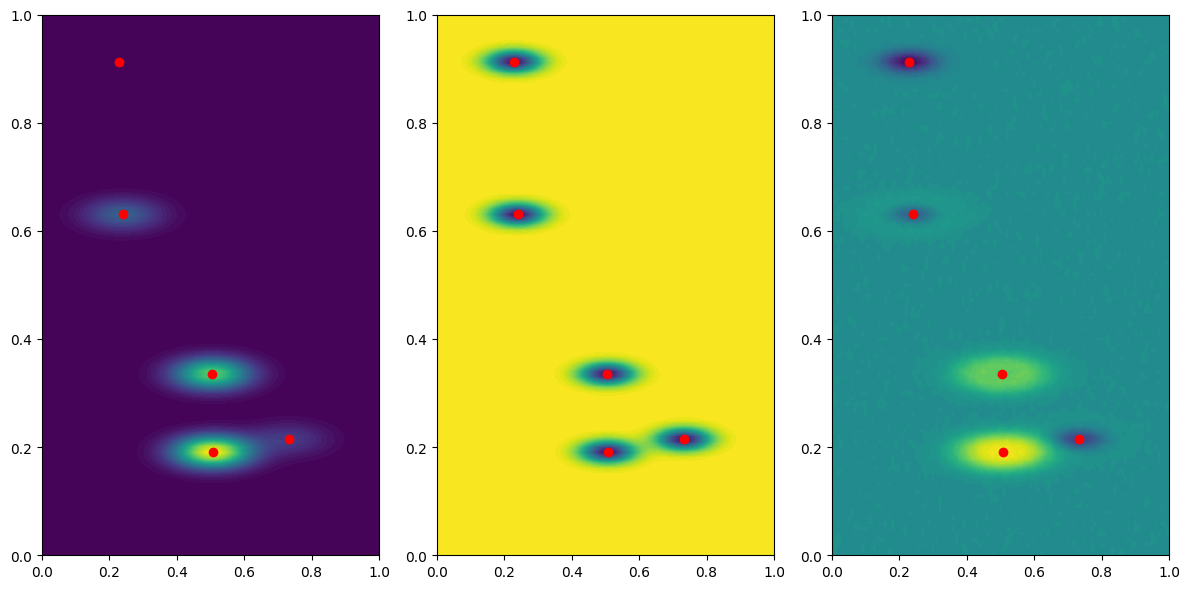

In [19]:
"""
First random batch of 5.
"""

raw_X = bo.GetRandomXBatch(batch_size=5)

raw_Y = np.empty([len(raw_X), 1])
for i, x in enumerate(raw_X):
    raw_Y[i, 0] = ObjectiveFunction(x)
    
bo.UpdateData(raw_X, raw_Y)

mean, variance = bo.PredictMeanVariance(candidate_x)
acq_function = bo.AcquisitionFunction(mean, variance, kappa=1)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
axs[0].contourf(X1, X2, mean.reshape(len(X1), len(X2)), levels=50)
axs[0].scatter(bo.X_data[:, 0], bo.X_data[:, 1], color='red')

axs[1].contourf(X1, X2, variance.reshape(len(X1), len(X2)), levels=50)
axs[1].scatter(bo.X_data[:, 0], bo.X_data[:, 1], color='red')

axs[2].contourf(X1, X2, acq_function.reshape(len(X1), len(X2)), levels=50)
axs[2].scatter(bo.X_data[:, 0], bo.X_data[:, 1], color='red')

plt.tight_layout()

In [20]:
raw_X, raw_Y

(array([[0.50534696, 0.33544276],
        [0.73255725, 0.21457363],
        [0.23974729, 0.63021683],
        [0.50689843, 0.19144457],
        [0.22933271, 0.91293524]]),
 array([[-2.68273009],
        [-7.34872206],
        [-6.34366075],
        [-0.6941942 ],
        [-8.77597792]]))

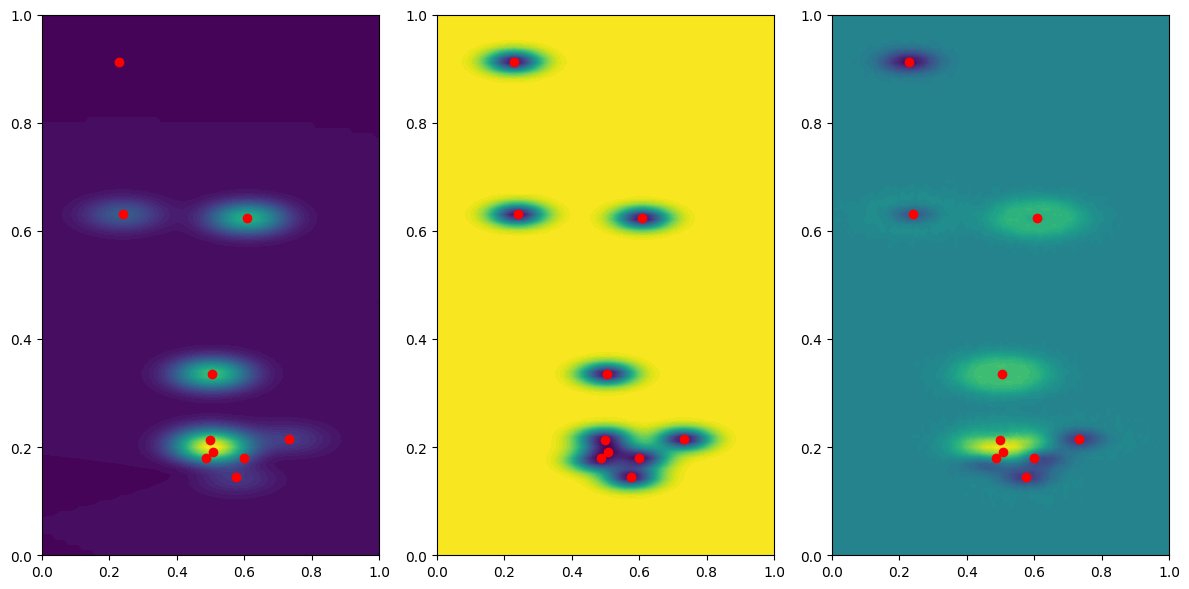

In [21]:
"""
Next batch of 5 (not random).
"""
raw_X = bo.GetNextXBatch(batch_size=5, max_kappa=max_kappa, min_kappa=min_kappa)
raw_Y = np.empty([len(raw_X), 1])
for i, x in enumerate(raw_X):
    raw_Y[i, 0] = ObjectiveFunction(x)

bo.UpdateData(raw_X, raw_Y)

mean, variance = bo.PredictMeanVariance(candidate_x)
acq_function = bo.AcquisitionFunction(mean, variance, kappa=1)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
axs[0].contourf(X1, X2, mean.reshape(len(X1), len(X2)), levels=50)
axs[0].scatter(bo.X_data[:, 0], bo.X_data[:, 1], color='red')

axs[1].contourf(X1, X2, variance.reshape(len(X1), len(X2)), levels=50)
axs[1].scatter(bo.X_data[:, 0], bo.X_data[:, 1], color='red')

axs[2].contourf(X1, X2, acq_function.reshape(len(X1), len(X2)), levels=50)
axs[2].scatter(bo.X_data[:, 0], bo.X_data[:, 1], color='red')

plt.tight_layout()

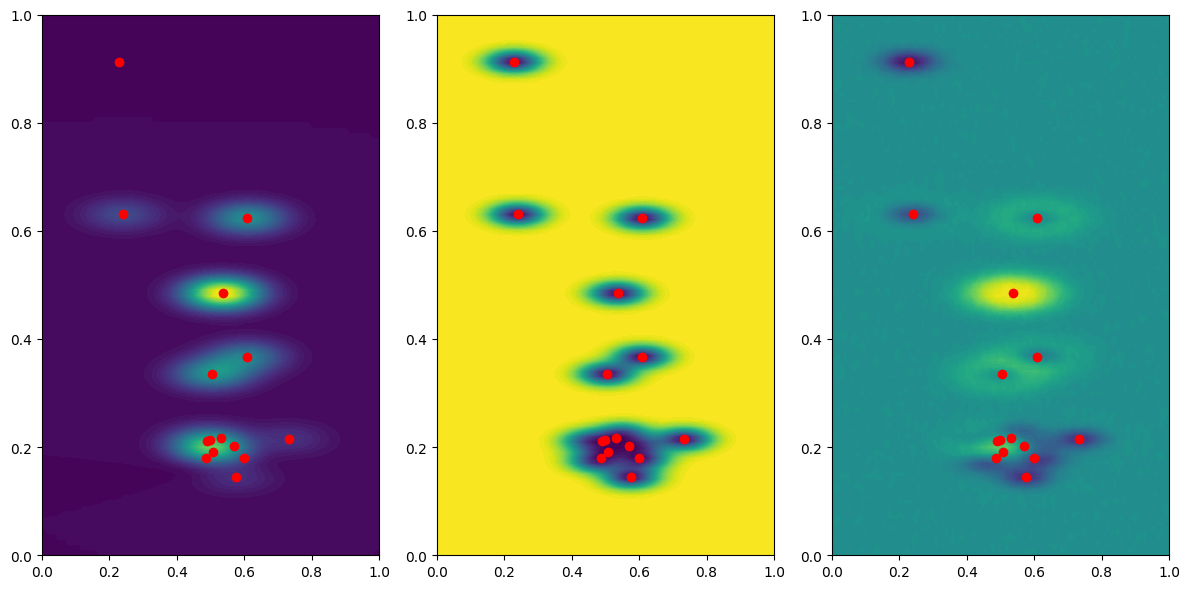

In [22]:
"""
Next batch of 5 (not random).
"""
raw_X = bo.GetNextXBatch(batch_size=5, max_kappa=max_kappa, min_kappa=min_kappa)
raw_Y = np.empty([len(raw_X), 1])
for i, x in enumerate(raw_X):
    raw_Y[i, 0] = ObjectiveFunction(x)

bo.UpdateData(raw_X, raw_Y)

mean, variance = bo.PredictMeanVariance(candidate_x)
acq_function = bo.AcquisitionFunction(mean, variance, kappa=1)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
axs[0].contourf(X1, X2, mean.reshape(len(X1), len(X2)), levels=50)
axs[0].scatter(bo.X_data[:, 0], bo.X_data[:, 1], color='red')

axs[1].contourf(X1, X2, variance.reshape(len(X1), len(X2)), levels=50)
axs[1].scatter(bo.X_data[:, 0], bo.X_data[:, 1], color='red')

axs[2].contourf(X1, X2, acq_function.reshape(len(X1), len(X2)), levels=50)
axs[2].scatter(bo.X_data[:, 0], bo.X_data[:, 1], color='red')

plt.tight_layout()

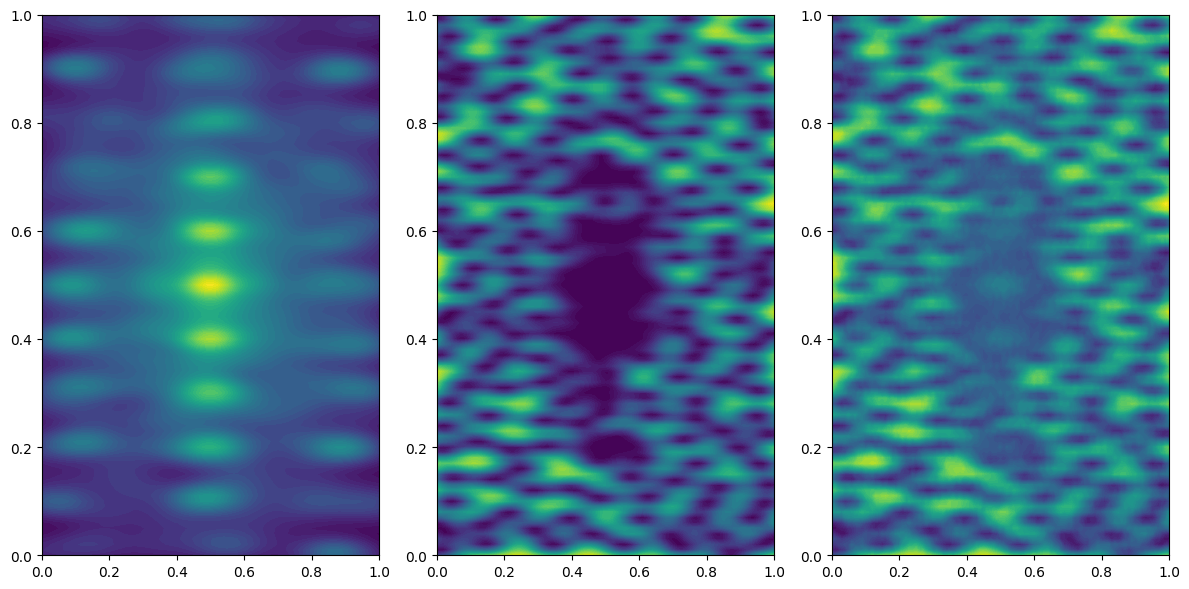

In [23]:
"""
Lets do 60 iterations of 5 batches each all at once and see how
well we are able to model the true function.
"""

iterations = 60
for i in range(iterations):
    raw_X = bo.GetNextXBatch(batch_size=5, max_kappa=max_kappa, min_kappa=min_kappa)
    raw_Y = np.empty([len(raw_X), 1])
    for i, x in enumerate(raw_X):
        raw_Y[i, 0] = ObjectiveFunction(x)

    bo.UpdateData(raw_X, raw_Y)

mean, variance = bo.PredictMeanVariance(candidate_x)
acq_function = bo.AcquisitionFunction(mean, variance, kappa=5)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
axs[0].contourf(X1, X2, mean.reshape(len(X1), len(X2)), levels=50)
# axs[0].scatter(bo.X_data[:, 0], bo.X_data[:, 1], color='red')

axs[1].contourf(X1, X2, variance.reshape(len(X1), len(X2)), levels=50)
# axs[1].scatter(bo.X_data[:, 0], bo.X_data[:, 1], color='red')

axs[2].contourf(X1, X2, acq_function.reshape(len(X1), len(X2)), levels=50)
# axs[2].scatter(bo.X_data[:, 0], bo.X_data[:, 1], color='red')

plt.tight_layout()

6.90936845157006


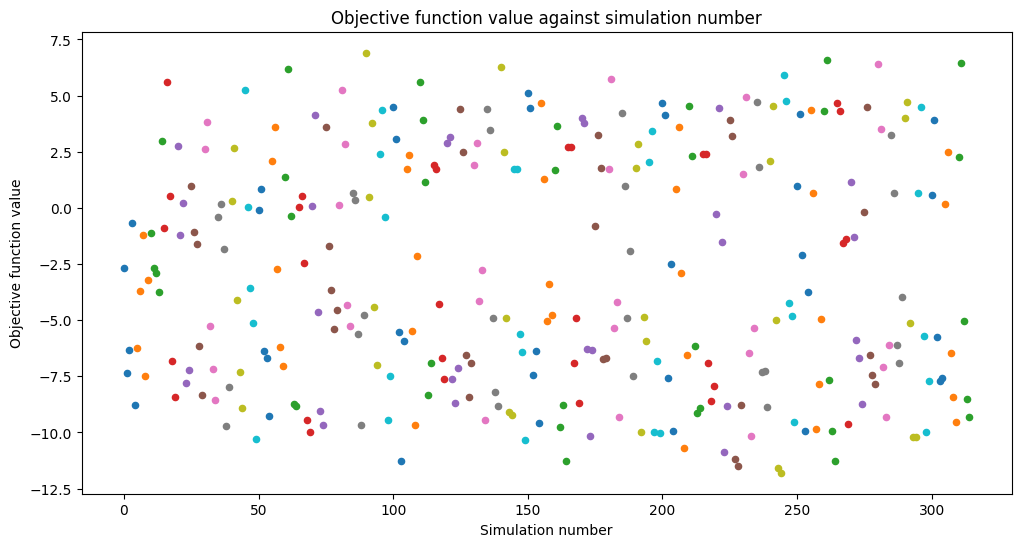

In [24]:
"""
See how the optimisation process progressed
"""

print(np.max(bo.y_data))
BOPackage.PlotData(bo)

Optimal parameters: [0.0869597  0.02450355]
Function value at optimum: 3058.726873911044
Converged: True
Number of iterations: 7
Number of function evaluations: 30


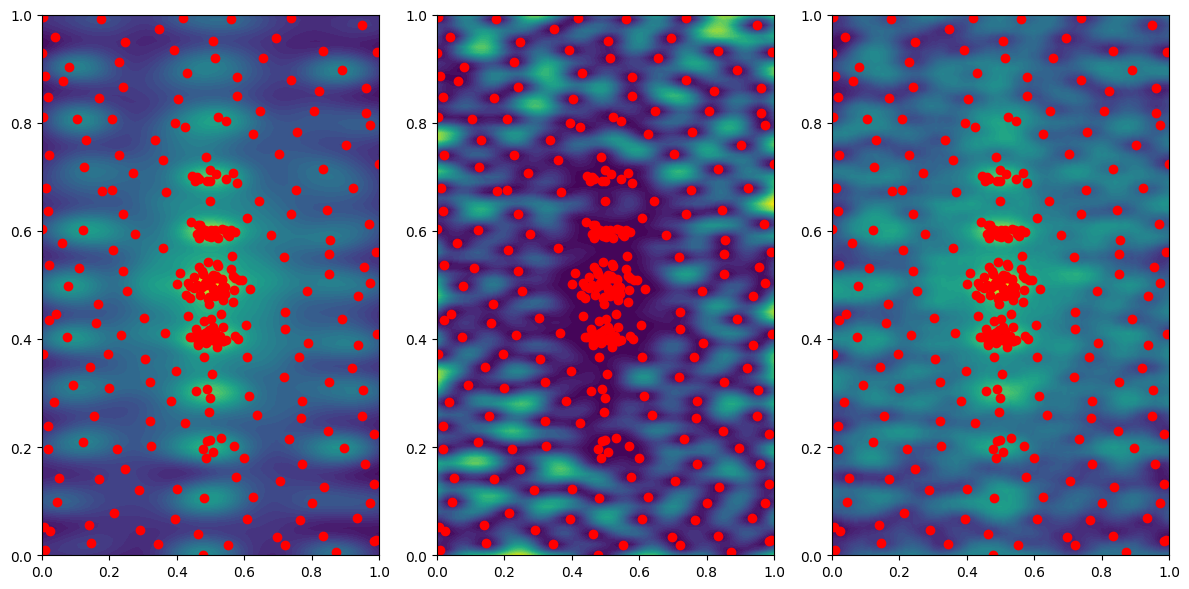

In [25]:
"""
Can ignore this for now. See Kernel optimisation for more details. 
Used to find the lengthscale of each axis.
"""

new_length_scales = BOPackage.OptimiseLML(Kernel, bo.X_data, bo.y_data, noise, bo.length_scale.flatten()).reshape(-1, 1)
bo.length_scale = new_length_scales


"""
Next batch of 5 (not random).
"""
raw_X = bo.GetNextXBatch(batch_size=5, max_kappa=max_kappa, min_kappa=min_kappa)
raw_Y = np.empty([len(raw_X), 1])
for i, x in enumerate(raw_X):
    raw_Y[i, 0] = ObjectiveFunction(x)

bo.UpdateData(raw_X, raw_Y)

mean, variance = bo.PredictMeanVariance(candidate_x)
acq_function = bo.AcquisitionFunction(mean, variance, kappa=1)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
axs[0].contourf(X1, X2, mean.reshape(len(X1), len(X2)), levels=50)
axs[0].scatter(bo.X_data[:, 0], bo.X_data[:, 1], color='red')

axs[1].contourf(X1, X2, variance.reshape(len(X1), len(X2)), levels=50)
axs[1].scatter(bo.X_data[:, 0], bo.X_data[:, 1], color='red')

axs[2].contourf(X1, X2, acq_function.reshape(len(X1), len(X2)), levels=50)
axs[2].scatter(bo.X_data[:, 0], bo.X_data[:, 1], color='red')

plt.tight_layout()

Optimal parameters: [0.07101946 0.02287739]
Function value at optimum: 3464.8912781575154
Converged: True
Number of iterations: 17
Number of function evaluations: 102


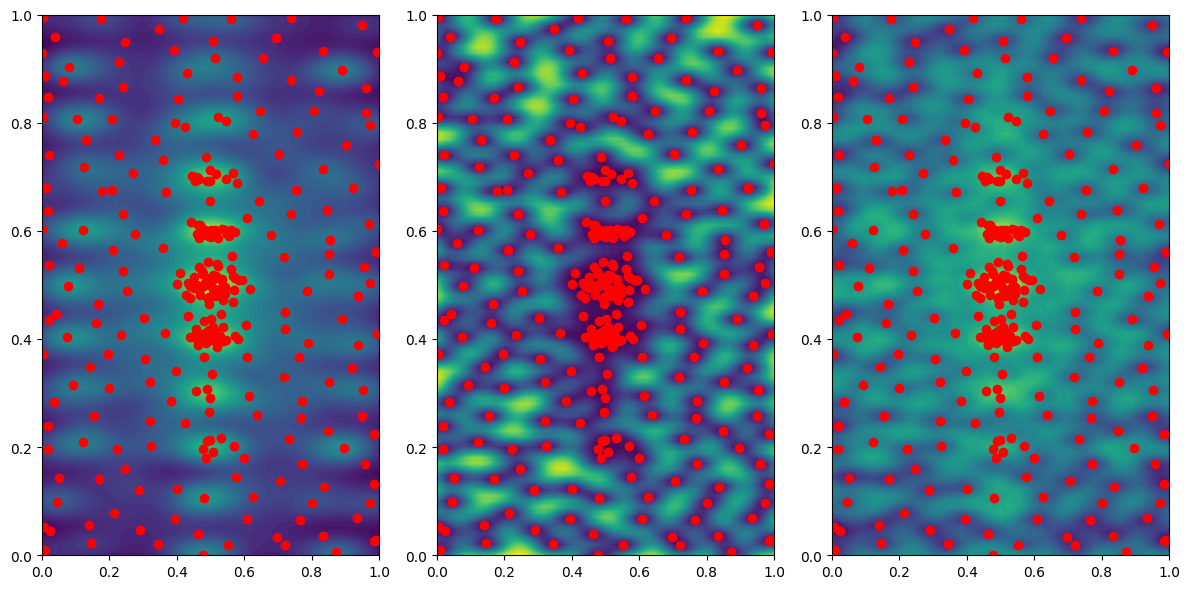

In [26]:
# Example usage:
num_kernel_params = 3  # Length scale + variance + noise

# Bounds: no lower bound (negative infinity), upper bound is log(10000) for kernel parameters
kernel_bounds = [(-np.inf, np.log(10000)), (-np.inf, np.log(10000)), (-np.inf, np.log(1e-4))]

# Define initial parameters (initial guess for length scales)
initial_params = np.array([5, 0.1, 1e-4])  # Initial guess for length scale and noise

# Call the optimization function
optimal_params =  BOPackage.OptimiseLML(Kernel, bo.X_data, bo.y_data, 1e-4, np.array([5, 5]), lambda_penalty=1000)

# Assign the optimal parameters
bo.length_scale = optimal_params[:2].reshape(-1, 1)
bo.noise = optimal_params[-1]

mean, variance = bo.PredictMeanVariance(candidate_x)
acq_function = bo.AcquisitionFunction(mean, variance, kappa=1)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
axs[0].contourf(X1, X2, mean.reshape(len(X1), len(X2)), levels=50)
axs[0].scatter(bo.X_data[:, 0], bo.X_data[:, 1], color='red')

axs[1].contourf(X1, X2, variance.reshape(len(X1), len(X2)), levels=50)
axs[1].scatter(bo.X_data[:, 0], bo.X_data[:, 1], color='red')

axs[2].contourf(X1, X2, acq_function.reshape(len(X1), len(X2)), levels=50)
axs[2].scatter(bo.X_data[:, 0], bo.X_data[:, 1], color='red')

plt.tight_layout()